[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/main?filepath=notebooks%2FAula_19_Redes_Neurais_Convolucionais_com_PyTorch.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_19_Redes_Neurais_Convolucionais_com_PyTorch.ipynb)

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ValueError: Mountpoint must not already contain files

# Redes Neurais Convolucionais com PyTorch

**Objetivos**: Aprender Redes Neurais Convolucionais (_Convolution Neural Networks_ - CNN) usando a biblioteca `PyTorch`.

> Observação: Algumas imagens foram adaptadas de [Adventures in Machine Learning](https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/) (Licença CC-BY-SA).

## PyTorch

[**PyTorch**](https://www.pytorch.org/) é uma biblioteca de código aberto para aprendizado de máquina aplicável a uma ampla variedade de tarefas. Foi criada pelo **Facebook** em 2016 e é a principal biblioteca para criação e treinamento de redes neurais artificiais. A API toda é escrita em Python mas é executada em C++ na CPU ou em CUDA/ROCM na GPU.

No momento que eu escrevo esse tutorial (Abril de 2021), PyTorch está superando o TensorFlow (Google) em desempenho e adoção de uso. Isso acontece tanto na [academia](http://horace.io/pytorch-vs-tensorflow/) (mensurado pela adoção de artigos científicos nos principais encontros científicos de Aprendizagem Profunda e Aprendizagem de Máquina) quanto na [indústria](https://www.infoworld.com/article/3597904/why-enterprises-are-turning-from-tensorflow-to-pytorch.html) (mensurado pela adoção de grandes e renomadas empresas de tecnologia).

### Atualização (Junho 2022):

TensorFlow está morto, Vida Longa ao PyTorch: [Google lost the battle for machine learning to Meta, insiders say. Now it's betting the future of its own products on a new internal AI project.](https://www.businessinsider.com/facebook-pytorch-beat-google-tensorflow-jax-meta-ai-2022-6).

> Now, under the shadow of PyTorch, Google has been quietly building out a machine learning framework, called JAX (at one point an acronym for "Just After eXecution," but officially no longer stands for anything), that many see as the successor to TensorFlow.

Meus comentários: JAX é mais um backend de _autodiff_ do que uma biblioteca de redes neurais.
Ou seja tem um uso muito mais amplo que PyTorch.
Por exemplo, como um amostrador Monte Carlo de correntes ou cadeias Markov (_Markov Chain Monte Carlo_ - MCMC).

## Imagens e Filtros

Todo dado estruturado e não-esturutado é representado como matrizes no computador.
Veja o caso de imagens.
Elas são literalmente matrizes multidimensionais.

* Uma imagem colorida é uma Array de dimensão $X \times Y \times 3$:
    * $X$ = quantidade de pixels no eixo horizontal
    * $Y$ = quantidade de pixels no eixo vertical
    * $3$ = são 3 canais de cores - **R**ed, **G**reen e **B**lue

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/images_as_matrix.png?raw=1" alt="Row vs Cols" style="width: 500px;"/>

#### Convoluções

Em matemática **[convolução](https://pt.wikipedia.org/wiki/Convolu%C3%A7%C3%A3o) é um operador linear** que, a partir de **duas funções dadas**, **resulta numa terceira que mede a soma do produto dessas funções ao longo da região** subentendida pela superposição delas em função do deslocamento existente entre elas.

A notação para a convolução de $f$ e $g$ é $f*g$. Ela é definida como a integral do produto de uma das funções por uma cópia deslocada e invertida da outra; a função resultante $h$ depende do valor do deslocamento. Se $x$ for a variável independente e $u$, o deslocamento, a fórmula pode ser escrita como:

$$(f * g) (x) = h(x) = \int_{-\infty}^{\infty} f(u) \cdot g(x-u) du$$

Existe ainda uma definição de **convolução para funções de domínio discreto**, dada por

$$(f * g) (k) = h(k)= \sum_{j=0}^{k} f(j) \cdot g(k-j)$$

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/convolution.gif?raw=1" alt="Row vs Cols" style="width: 400px;"/>

Inclusive, convoluções, onde a "máquina" aprende os filtros (os números que vão dentro da matriz), é a base das redes neurais que detectam objetos!

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/deeplearning_convolutions.gif?raw=1" alt="Deep Learning Convolutions" style="width: 600px;"/>

## O que é uma Rede Neural Artificial?

Redes neurais artificiais (RNAs) são modelos computacionais inspirados pelo sistema nervoso central (em particular o cérebro) que são capazes de realizar o aprendizado de máquina bem como o reconhecimento de padrões. Redes neurais artificiais geralmente são apresentadas como sistemas de "neurônios interconectados, que podem computar valores de entradas", simulando o comportamento de redes neurais biológicas.

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/redes_neurais.jpeg?raw=1" alt="redes neurais" style="width: 500px;"/>

## Como a rede neural aprende?

Em cada neurônio há uma função de ativação (*activation function*) que processa uma combinação linear entre _inputs_ e pesos sinápticos, gerando assim um sinal de saída.

A informação flui da *input layer* para as *hidden layers* e por fim para a *output layer*. Nesse fluxo os inputs de dados da *input layer* são alimentados para os neurônios das *hidden layers* que por fim alimentam o neurônio final da *output layer*.

A primeira passada de informação (propagação) pela rede é geralmente feita com parâmetros aleatórios para as funções de ativação dos neurônios.

Ao realizar a propagação, chamada de *feed forward*, temos sinais de saídas nos neurônios da output layer.

No fim da propagação, a função custo (uma métrica de erro) é calculada e o modelo então ajusta os parâmetros dos neurônios na direção de um menor custo (por meio do gradiente - derivada multivariada).

Assim uma nova propagação é gerada e a numa nova função custo e calculada. Assim como é realizado a atualização dos parâmetros dos neurônios.

O nome desse algoritmo é **Retro-propagação** (*Backpropagation*). E cada vez que ele é executado denomina-se como época (*epoch*). E quandos as épocas estabelecidas se encerram, a rede neural encerra o seu treinamento/aprendizagem.

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/backpropagation.gif?raw=1" alt="backpropagation" style="width: 500px;"/>

#### Por que Redes Neurais Convolucionais?
As Redes Neurais Convolucionais têm a capacidade de **extrair automaticamente características dos padrões a serem aprendidos** (por meio das camadas de convolução), tarefa que necessariamente tem que ser implementada separadamente quando se emprega uma Rede Neural padrão ("vanilla", _**M**ulti**l**ayer **P**erceptron_ - MLP) ou um outro classificador convencional (por exemplo, _**S**upport **V**ector **M**achine_ - SVM)


#### O que muda numa Rede Neural Convolucional?

**Nada**.

Apenas que a rede neural possui um maior número de parâmetros pois precisa aprender todos os parâmetros dos filtros e convoluções que ocorrem em algumas de suas camadas internas.

### Camadas Necessárias para Convolução

As redes neurais convolucionais se distinguem de outras redes neurais por seu desempenho superior com dados de imagem, voz ou áudio. Elas têm três tipos principais de camadas, que são:

* Camada Convolucional
* Camada de _Pooling_
* Camada de Neurônios Totalmente Conectados (também chamado de _Fully Connected_ ou _Dense_)


#### Camadas de Convolução (_Convolution Layers_)

Isto é uma camada para uma "janela" ou "filtro" deslizante que passamos pela imagem.
Essa "janela" aplica um certo peso aos neurônios (pixels) adjacentes de uma certa vizinhança de pixels.

Filtro $2 \times 2$ com todos os pesos igual a $0.5$:

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/moving-filter.webp?raw=1" alt="filtro convolução 2x2" style="width: 500px;"/>

$$\begin{align}
 out_1 &= 0.5 in_1 + 0.5 in_2 + 0.5 in_6 + 0.5 in_7 \\
 &= 0.5 \times 2.0 + 0.5 \times 3.0 + 0.5 \times 2.0 + 0.5 \times 1.5  \\
 &= 4.25 \\
 out_2 &= 0.5 in_2 + 0.5 in_3 + 0.5 in_7 + 0.5 in_8 \\
 &= 0.5 \times 3.0 + 0.5 \times 0.0 + 0.5 \times 1.5 + 0.5 \times 0.5  \\
 &= 2.5 \\
 \end{align}$$

Na rede neural este filtro funciona assim quando compararmos com relação a camada anterior (_inputs_):

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/moving-filter-node-diagram.webp?raw=1" alt="filtro convolução 2x2" style="width: 300px;"/>

#### Camadas de _Pooling_

Uma outra técnica de "janela" ou "filtro" deslizante, mas ao invés de aplicar pesos, aplica uma função estatística sobre os conteúdos da sua "janela".

A função estatística mais comum é o máximo `max()`.
Essa é chamada de _max pooling_.

##### Duas vantagens:

- Reduz o número de parâmetros do modelo por um processo chamado _down-sampling_
- Faz com que a detecção de atributos seja mais robusta à mudanças na orientação do objeto e mudanças de escalas

_Max pooling_ com _padding_:

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/max-pooling.webp?raw=1" alt="Max Pooling" style="width: 500px;"/>

#### Juntanto todas as camadas

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/typical_cnn.webp?raw=1" alt="Rede Neural Convolucional Típica" style="width: 500px;"/>

### Estruturação dos módulos de PyTorch

```python
import torch
```
* [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) - Tensores (arrays N-D)
* [`torch.nn`](https://pytorch.org/docs/stable/nn.html) - Redes Neurais (_**N**eural **N**etworks_)
* [`torch.optim`](https://pytorch.org/docs/stable/optim.html) - Otimização (_**Optim**ization_)
* [`torch.data`](https://pytorch.org/docs/stable/data.html) - *Datasets* e Ferramentas de Streaming de Dados
* [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) - Diferenciação Automática (_**Auto**matic Differentiation_)
* [`torch.vision`](https://pytorch.org/docs/stable/torchvision/index.html) - Ferramentas de Manipulação de Imagens e Visão Computacional
* [`torch.audio`](https://pytorch.org/audio/stable/index.html) - Ferramentas de Manipulação de Áudio
* [`torch.jit`](https://pytorch.org/docs/stable/jit.html) - Compilação _**j**ust-**i**n-**t**ime_ de modelos PyTorch em binários


### `torch.Tensor`

* `NumPy` - `np.ndarray`
* `pandas` - `pd.Series` e `pd.DataFrame`
* `PyTorch` - `torch.Tensor`

## Exemplo com o [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

O dataset **MNIST** (_**M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology_) é um clássico de Deep Learning. São imagens preto e branco de dígitos de 0 a 9 de formato 28x28 pixels (784 pixels)

Contém 60.000 imagens de treino e 10.000 de teste e é um padrão de benchmark de modelos (acho que "foi", não é tão usado assim mais)


<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/MNIST.png?raw=1" alt="MNIST" style="width: 500px;"/>

O pacote `torchvision` do `PyTorch` tem integrado já o dataset MNIST:

In [1]:
import torchvision
from torchvision import transforms

# MNIST dataset
root_path = '/content/drive/MyDrive/Colab Notebooks/Downloads' # mude isso no Colab se necessário

# Pequena transformação para tensores e normalizando o tamanho
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Train/Test Datasets
full_train_dataset = torchvision.datasets.MNIST(root=root_path, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=root_path, train=False, transform=trans)

100%|██████████| 9.91M/9.91M [00:01<00:00, 7.84MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 206kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.32MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.33MB/s]


In [3]:
full_train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/Downloads
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

### 2. Divisão em Treino e Validação

Usamos `random_split` para dividir o `full_train_dataset` em um conjunto de treino e um de validação. Uma divisão comum é 80% para treino e 20% para validação.

In [4]:
from torch.utils.data import random_split
# Definir os tamanhos para treino e validação
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

# Dividir o dataset
train_dataset, val_dataset = random_split(
    full_train_dataset, [train_size, val_size])

print(f"Tamanho do dataset de treino: {len(train_dataset)}")
print(f"Tamanho do dataset de validação: {len(val_dataset)}")
print(f"Tamanho do dataset de teste: {len(test_dataset)}")

Tamanho do dataset de treino: 48000
Tamanho do dataset de validação: 12000
Tamanho do dataset de teste: 10000


Para controlar como que os dados são inseridos no modelo e, logo, o Batch Size é preciso implementar um [`torch.utils.data.DataLoader()`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

Argumentos do `DataLoader()`:

* **`dataset`**: um `Dataset` PyTorch
    * tem [vários tipos](https://pytorch.org/docs/stable/data.html)
    * no nosso exemplo vou usar um simples [`TensorDataset`](https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#TensorDataset) que é um wrapper de `np.ndarray` e `pd.Series` para `torch.Tensor`)
* **batch_size**: `int` - tamanho do Batch Size, padrão é 1
* **shuffle**: `bool` - se vai embaralhar os dados antes de enviar em batches ao modelo, padrão é `False`. Recomendo usar `shuffle=True`

In [5]:
from torch.utils.data import DataLoader

batch_size=32

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

#### [Camadas de Convolução (_Convolution Layers_)](https://pytorch.org/docs/stable/nn.html#convolution-layers)

* [`nn.Conv1d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv3d): convolução 1-D.
* [`nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): convolução 2-D.
* [`nn.Conv3d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv3d.html): convolução 3-D.

#### [Camadas de _Pooling_](https://pytorch.org/docs/stable/nn.html#pooling-layers)

* [`nn.MaxPool1d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.htm): 1-D _max pooling_.
* [`nn.MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.htm): 2-D _max pooling_.
* [`nn.MaxPool3d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool3d.htm): 3-D _max pooling_.

### Qual a rede neural convolucional que vamos criar para o MNIST?

<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/MNIST-CNN.webp?raw=1" alt="MNIST CNN" style="width: 700px;"/>

## Como construir sua rede neural convolucional no PyTorch

Construir redes neurais com o **PyTorch** é fácil.

Temos que criar uma Rede Neural a partir de uma classe [`nn.Module()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=module#torch.nn.Module) e criar um construtor com o método `__init__()` e implementar todas as layers e propagações desejadas com o método `forward()`.

In [6]:
import torch.nn as nn

In [8]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Sequential(
            nn.Linear(7 * 7 * 64, 1000),
            nn.ReLU())
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

# Instancia o Model()
model = ConvNet()

print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=3136, out_features=1000, bias=True)
    (1): ReLU()
  )
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)


Quantos paramêtros temos?

In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

3199106

## Como treinar sua rede neural no PyTorch

Uma vez especificado e instanciado o modelo, podemos manipulá-lo de maneira dinâmica.
Escolhemos a função custo (`loss_fn`) como `nn.CrossEntropyLoss()` e também a taxa de aprendizagem $\eta$ em `1e-6` e a quantidade de épocas a serem treinadas (`epochs`):

```python
model = Sua_rede_neural()
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-6
epochs = 100

# Instânciar o Otimizador Adam
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For-loop de treino
for epoch in range(epochs): # para cada época
    for (images, labels) in train_loader: # para cada batch
        # Gera a propagação (feed forward)
        outputs = model(images)
        
        # Calcula a função-custo
        loss = loss_fn(outputs, labels)
        
        # Retro-propagação (Backprop) e a otimização com Adam
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

In [10]:
from torch.optim import Adam

# Hiperparâmetros
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
epochs = 6

# Instânciar o Otimizador Adam
optimizer = Adam(model.parameters(), lr=learning_rate)

### OBSERVAÇÃO

Esta rede neural possui muitos parâmetros.
Aproximadamente 3 milhões e 200 mil paramêtros!
Não tente rodar isso sem ser usando uma GPU!
O Google Colab te dá uma GPU de graça.
Clique no botão abaixo para abrir este notebook no Google Colab.
Não esqueça de trocar sua `Runtime` de `None` para `GPU`.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_19_Redes_Neurais_Convolucionais_com_PyTorch.ipynb)

In [99]:
# Isto tem que retornar True
import torch
torch.cuda.is_available()

True

In [100]:
# Sua GPU
torch.cuda.get_device_name()

'Tesla T4'

### Enviar Modelo para GPU (se disponível) EX:1

In [101]:
from torch import device


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando o dispositivo: {device}')


Usando o dispositivo: cuda


In [102]:
total_step = len(train_loader)

train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_val_acc = 0

model.to(device)

for epoch in range(epochs):
    # ---- Treino ----
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Acumula loss e acurácia
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i + 1) % 100 == 0:
            print(f"Época [{epoch+1}/{epochs}], Step [{i+1}/{total_step}], "
                  f"Custo: {loss.item():.3f}, "
                  f"Acurácia: {(correct/total)*100:.2f}%")

    # Médias de treino
    train_loss /= len(train_loader.dataset)
    train_acc = 100 * correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    # ---- Validação ----
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = 100 * correct / total
    valid_loss_list.append(val_loss)
    valid_acc_list.append(val_acc)

    print(f"Validação - Época [{epoch+1}/{epochs}], "
          f"Custo: {val_loss:.3f}, Acurácia: {val_acc:.2f}%")

Época [1/6], Step [100/1500], Custo: 0.277, Acurácia: 81.78%
Época [1/6], Step [200/1500], Custo: 0.042, Acurácia: 88.55%
Época [1/6], Step [300/1500], Custo: 0.040, Acurácia: 91.17%
Época [1/6], Step [400/1500], Custo: 0.109, Acurácia: 92.52%
Época [1/6], Step [500/1500], Custo: 0.114, Acurácia: 93.49%
Época [1/6], Step [600/1500], Custo: 0.111, Acurácia: 94.16%
Época [1/6], Step [700/1500], Custo: 0.007, Acurácia: 94.63%
Época [1/6], Step [800/1500], Custo: 0.064, Acurácia: 94.99%
Época [1/6], Step [900/1500], Custo: 0.016, Acurácia: 95.26%
Época [1/6], Step [1000/1500], Custo: 0.039, Acurácia: 95.57%
Época [1/6], Step [1100/1500], Custo: 0.005, Acurácia: 95.81%
Época [1/6], Step [1200/1500], Custo: 0.001, Acurácia: 96.03%
Época [1/6], Step [1300/1500], Custo: 0.111, Acurácia: 96.20%
Época [1/6], Step [1400/1500], Custo: 0.029, Acurácia: 96.35%
Época [1/6], Step [1500/1500], Custo: 0.005, Acurácia: 96.47%
Validação - Época [1/6], Custo: 0.064, Acurácia: 98.08%
Época [2/6], Step [100/

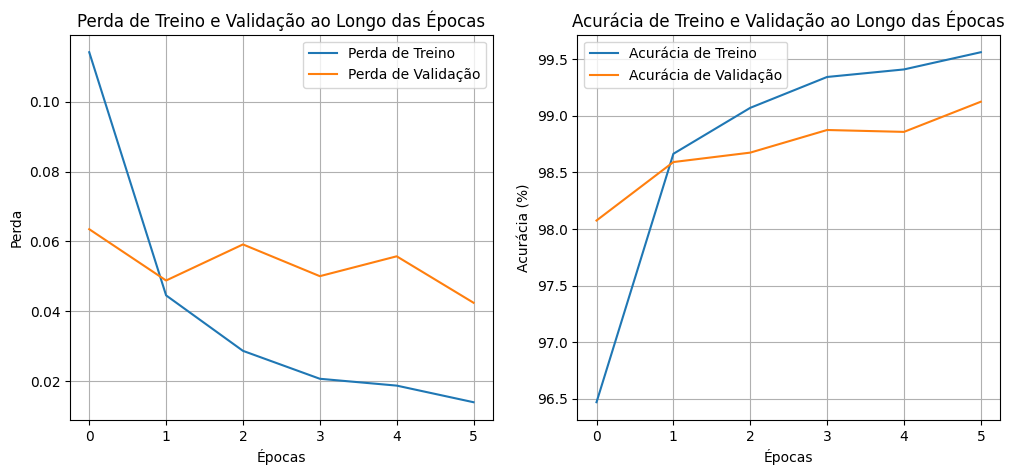

In [103]:
import matplotlib.pyplot as plt
# Plotando a perda de treino e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Perda de Treino')
plt.plot(valid_loss_list, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='Acurácia de Treino')
plt.plot(valid_acc_list, label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()
plt.title('Acurácia de Treino e Validação ao Longo das Épocas')
plt.grid()
plt.show()

### Acurácia do Modelo

Usar o comando `model.eval()`

Para a métrica acurácia, retorna um score de acurácia `float` entre $0$ e $1$

In [47]:
model.eval() # coloca o modelo em modo de avaliação (sem calcular gradientes)

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)
        # Feed-forward com as imagens de teste
        outputs = model(images)

        # gera predições usando a função max()
        _, predicted = torch.max(outputs.data, 1)

        # Acumula total e corretas
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Acurácia do Modelo em 10k imagens de teste: {round((correct / total) * 100, 3)}")

Acurácia do Modelo em 10k imagens de teste: 98.98
